First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

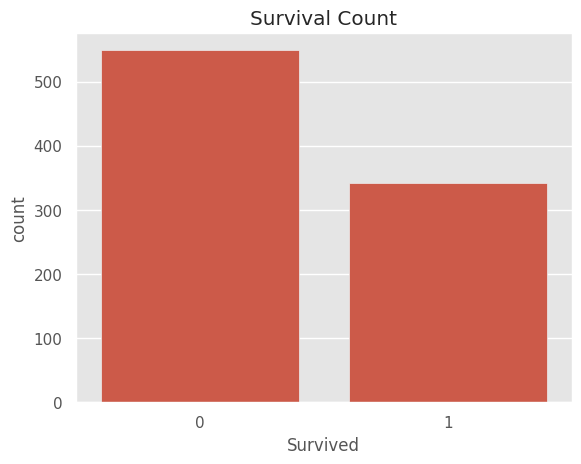

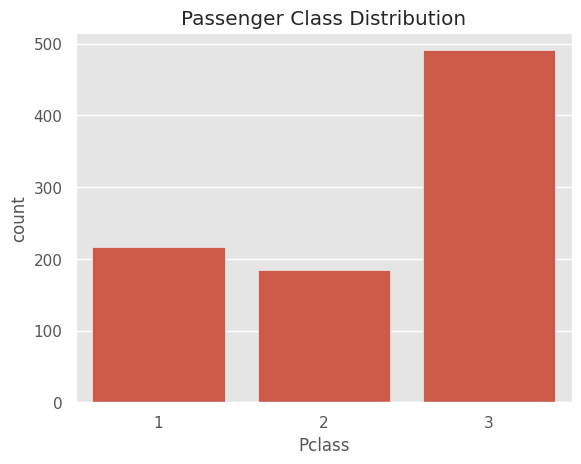

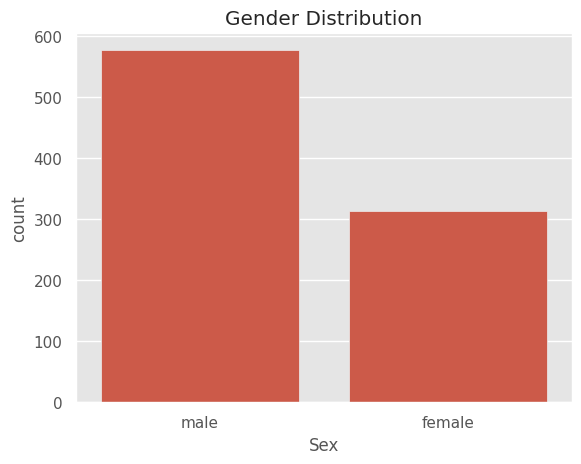

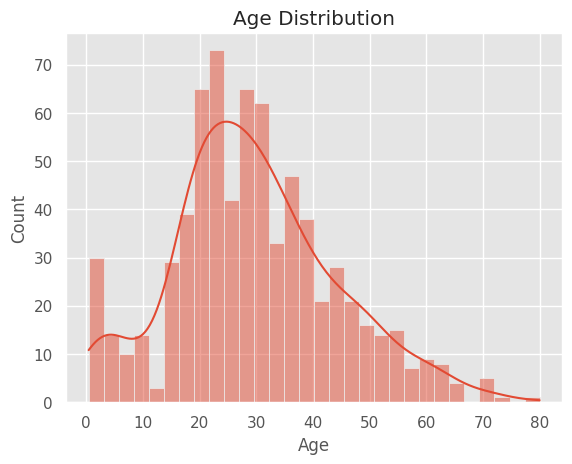

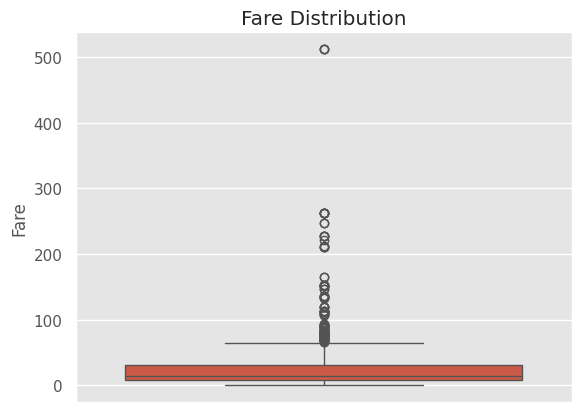

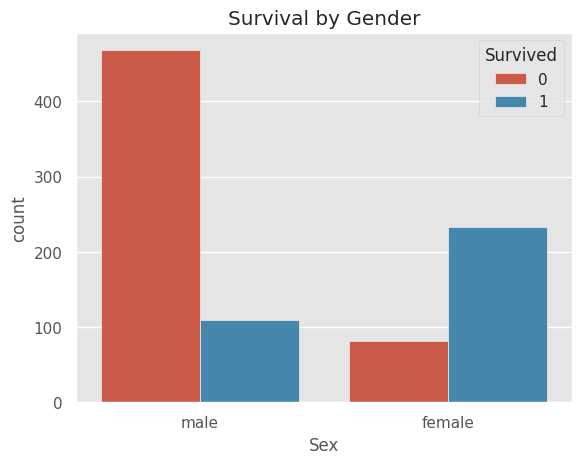

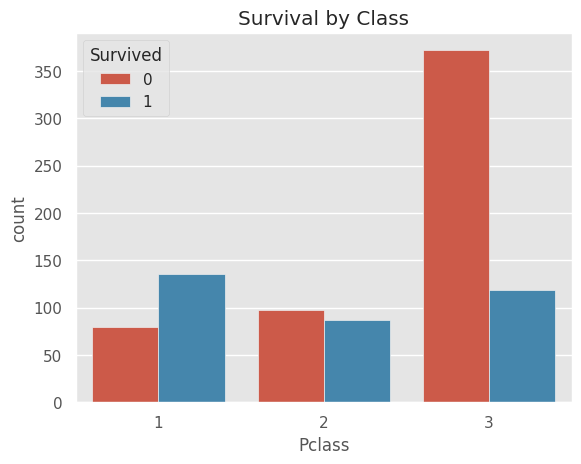

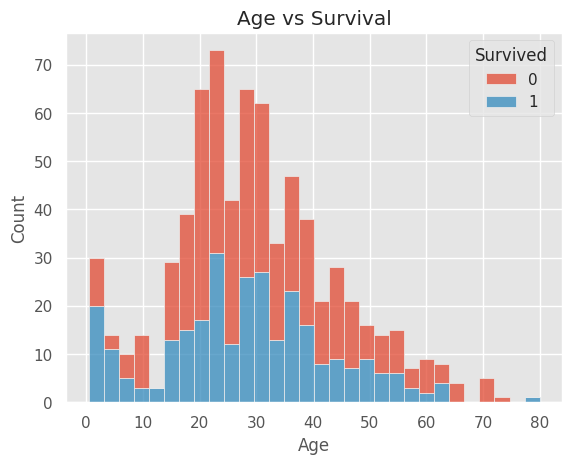

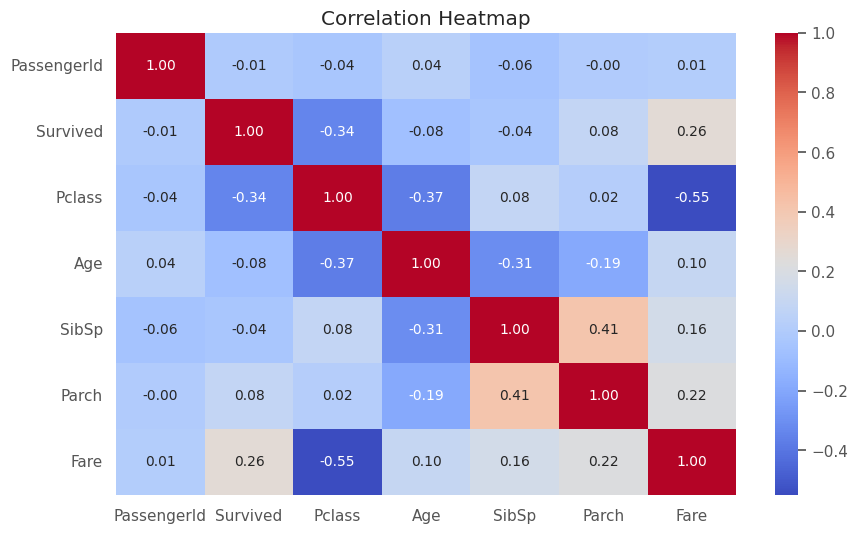

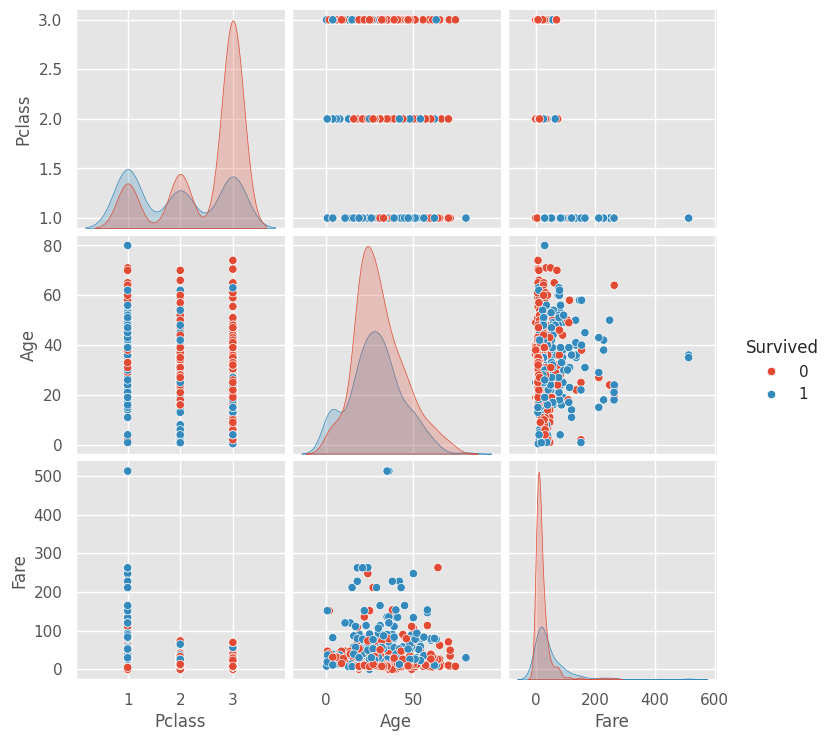

Titles:
 Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Key Findings:
- Women had a much higher survival rate.
- 1st class passengers were more likely to survive.
- Age and Fare show meaningful variation among survivors.
- Missing data was handled appropriately.



<ipython-input-1-5c6c8b11499a>:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-5c6c8b11499a>:76: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure plots
sns.set(style="whitegrid")
plt.style.use("ggplot")
%matplotlib inline

# Step 2: Load Dataset
df = pd.read_csv('train.csv')  # Change path if needed

# Step 3: Basic Info
print("First 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()
print("\nDescription:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# Step 4: Univariate Analysis
# Count plots
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

sns.countplot(data=df, x='Pclass')
plt.title("Passenger Class Distribution")
plt.show()

sns.countplot(data=df, x='Sex')
plt.title("Gender Distribution")
plt.show()

sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(data=df, y='Fare')
plt.title("Fare Distribution")
plt.show()

# Step 5: Bivariate Analysis
# Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

# Age vs Survived
sns.histplot(data=df, x='Age', hue='Survived', multiple="stack", bins=30)
plt.title("Age vs Survival")
plt.show()

# Step 6: Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 7: Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

# Step 8: Handling Missing Values
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing)
df.drop('Cabin', axis=1, inplace=True)

# Step 9: Feature Engineering (Optional but good)
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch']

# Title extraction from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print("Titles:\n", df['Title'].value_counts())

# Step 10: Final Summary (write in PDF or markdown)
summary = """
Key Findings:
- Women had a much higher survival rate.
- 1st class passengers were more likely to survive.
- Age and Fare show meaningful variation among survivors.
- Missing data was handled appropriately.
"""
print(summary)
